# Introduction to Python Project : FoodHub Data Analysis

![My Image](/content/drive/MyDrive/GLAIML/Projects/week1/FoodHub_banner.png)

## Problem Statement and context

FoodHub, a food aggregator company, bridges the gap between rising number restaurants and their customers through their mobile app.

The company wants to enhance the customer experience by analysing the demand of different restaurants based on the order details stored in their online portal.


## Data Dictionary

The orders data from the portal is fetched in the csv format. The structure of data and business significance of each field is given below:

1. order_id : Unique ID of the order
2. customer_id : ID of the registered customer who ordered the food.
3. restaurant_name : Name of the restaurant from which food is ordered.
4. cuisine_type : Cuisine ordered by the customer
5. cost_of_the_order : Cost of the order
6. day_of_the_week : Indicates whether the order wass placed on a weekday or a weekend, considering start of the week on Monday.
7. rating : Rating given by the customer out of 5
8. food_preparation_time : pick_up_time - order_confirmation_time
9. delivery_time : delivery_timestamp - pick_up_time

given the fine grained transaction records, it is possible to analyse multiple business questions.

## Import the required libraries

In [110]:
#numpy will be used for calculations of numerical columns
#pandas will be used to understand and manipulate dataset in the form of dataframe
#matplotlib and seaborn are used to plot graphs in EDA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Mounting drive and loading the data

In [111]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [112]:
# Read the csv source dataset
df = pd.read_csv('/content/drive/MyDrive/GLAIML/Projects/week1/foodhub_order.csv')

## Primary understanding of the data

In [113]:
# Write your code here to view the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [114]:
#To know the number of rows and columns in the dataset we use the 'shape' attribute of the pandas dataframe object
df.shape

(1898, 9)

**Observations**:
Rows (1,898): Each row represents a unique food order placed on the FoodHub platform. This gives us 1,898 individual food order records to analyze.

Columns (9): These represent different attributes or features related to each order

#### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [115]:
# The datatypes of each column can be derived from the 'info' method.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB
None


**Observations**:

The dataset contains 1,898 entries (rows) and 9 features (columns), representing individual food orders placed on the platform. Below are key observations from the dataset structure:

*  **No Missing Values**: All columns have 1,898 non-null values, indicating a
complete dataset with no missing entries. This ensures data reliability and simplifies preprocessing.


---



* **Data Types**:

  *Numerical Columns* (5 total):

  order_id, customer_id, food_preparation_time, delivery_time are of type int64.

  cost_of_the_order is of type float64.

  These numerical columns can be used for statistical analysis, correlation study, and visualization.

  *Categorical/Object Columns* (4 total):

  restaurant_name, cuisine_type, day_of_the_week, and rating are of type object.

  These represent qualitative variables useful for group-based analysis and frequency distributions.

---

* **Potential Data Quality Issue**:
  
  -> Since order_id and customer_id are only key columns and do not provide any meaningful insights, they could be stored as objects rather than integers for easy analysis.

  -> The rating column is stored as an object, which should ideally be numeric (int or float). This might indicate inconsistent formatting (e.g., strings like 'Not given', '5', etc.). It needs to be cleaned and converted for proper analysis.
---

* **Memory Usage**:

  The dataset occupies around 133.6 KB, which is manageable for in-memory analysis using tools like pandas


In [116]:
#Checking why the rating column is object instead of integer.
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

**Observation**:

* The values '5', '4', and '3' represent valid customer ratings (likely on a scale of 1 to 5).

* The value 'Not given' indicates missing or unrecorded ratings but is stored as a string rather than an actual NaN or null value.

* Data Quality Issue: Since the entire column is stored as an object type, numeric ratings are treated as strings, which could interfere with numerical analysis (e.g., calculating averages, plotting histograms).

#### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [117]:
print(df.isnull().sum().sum())


0


**Observations**:

There are no null values in the dataframe. Hence there is no need to preprocess.

#### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [118]:
# minimum time for food preparation

df['food_preparation_time'].min()

20

In [119]:
# average time for food preparation in minutes
print(df['food_preparation_time'].mean())

27.371970495258168


In [120]:
# maximum time for food preparation
print(df['food_preparation_time'].max())

35


**Observations**:
The food_preparation_time column has a **minimum** value of **20 minutes**, **maximum** value of **35 minutes**, which indicates that the food preparation times range over 15 minutes., with **most dishes taking around 27 minutes** to prepare. Since the mean lies closer to the center of the range, the data appears to be **fairly evenly distributed** without extreme skewness. The relatively narrow spread suggests moderate **consistency in preparation times** across different food items across restaurants.

#### **Question 5:** How many orders are not rated? [1 mark]

In [121]:
print(df.loc[df['rating']=='Not given'].count()['order_id'])

736


**Observations**:

Out of 1898 orders placed, **736** are not rated. So 4 in 10 customers hesitate to provide the feedback. This indicates a significant portion of the customers are **not engaging with the feedback system**, which may **impact the overall rating metrics**. Encouraging more customers to rate their orders could help in gaining better insights into the customer satisfaction and service quality. There is a need to fill these values with NaN for easy processing.

In [122]:
#Replace 'Not given' value in 'rating; column with NaN
df['rating'] = df['rating'].replace('Not given', np.nan)

#Cast the rating column to integer
df['rating'] = df['rating'].astype(float)

##**Exploratory Data Analysis (EDA)**

### **Univariate Analysis**

Univariate analysis is a type of **statistical analysis** that involves **examining one variable** at a time. The purpose is to describe and summarize the main characteristics of that single variable, to understand its **distribution, central tendency and spread**.

I am choosing **cost_of_the_order, rating, food_preparation_time, delivery_time** for univariate analysis since they are numerical columns

#### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#### 1. Cost of the order

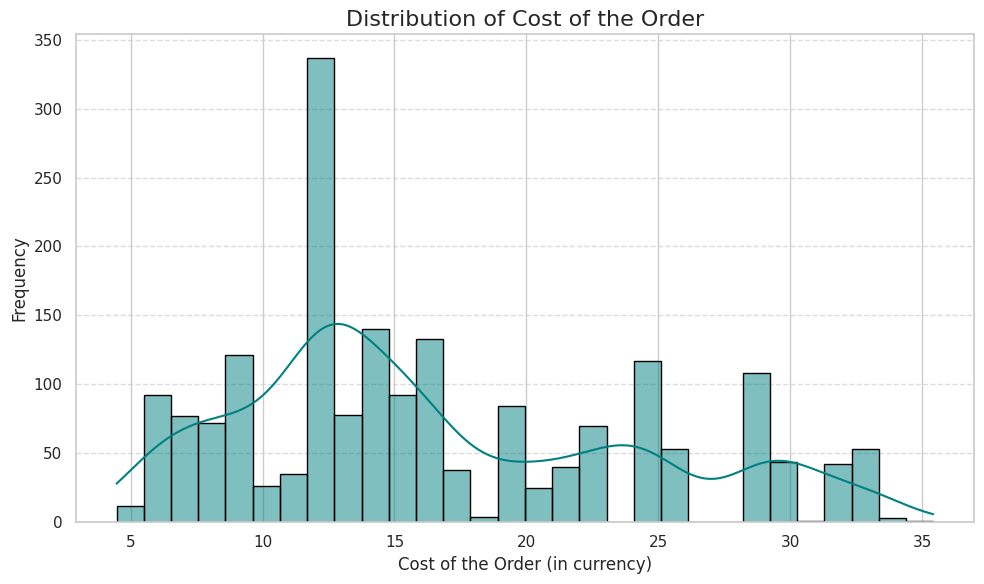

In [123]:
#Understanding the distribution of 'cost_of_the_order'

#Fixing the canvas size
plt.figure(figsize=(10, 6))

# Drawing the histplot to comprehend the distribution of data, its range, central tendency.
sns.histplot(data=df, x='cost_of_the_order', kde=True, bins=30, color='teal', edgecolor='black')

#Formatting the plot
plt.title('Distribution of Cost of the Order', fontsize=16)
plt.xlabel('Cost of the Order (in currency)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Observation** :
- The distribution of `cost_of_the_order` is right-skewed, indicating that    **most orders are of lower cost**, with fewer high-cost orders.
- This suggests customers tend to place **budget-friendly orders**, and premium-priced orders are relatively rare.

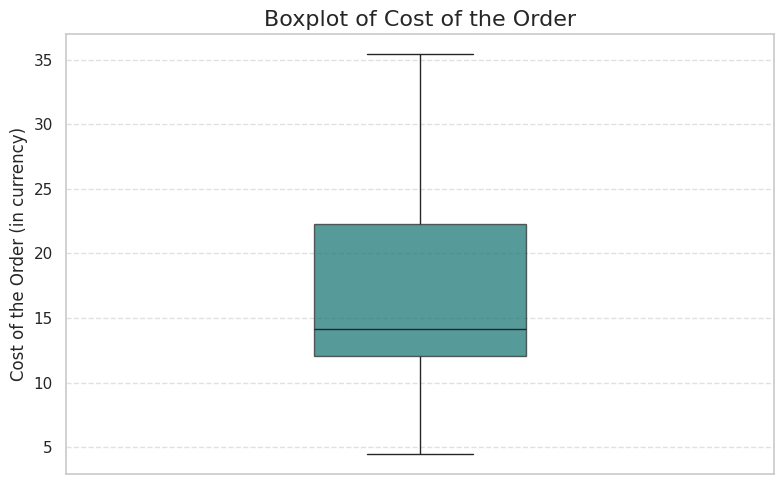

In [124]:
# Understanding the skewness and outliers in 'cost_of_the_order'
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, y='cost_of_the_order', color='teal', width=0.3, showfliers=True, boxprops=dict(alpha=0.7))

plt.title('Boxplot of Cost of the Order', fontsize=16)
plt.ylabel('Cost of the Order (in currency)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


**Observation**:
- The boxplot reveals that the **majority of orders fall within a narrow cost range**, with several **skewed high-value orders**.
- The presence of right skewness indicates occasional **premium orders**, which might be tied to specific cuisines or weekends.


#### 2. ratings

<ipython-input-125-74dfb89f9634>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rating', palette='Set1', order=sorted(df['rating'].unique()));


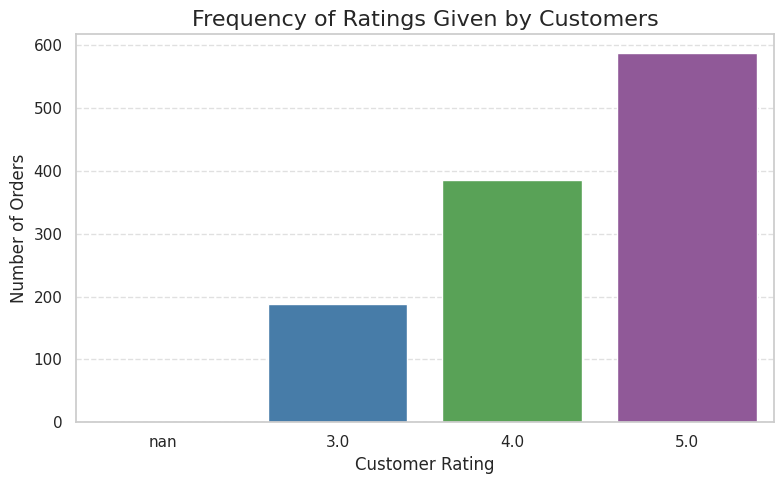

In [125]:
#Plotting the count plot to understand the nature of ratings
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='rating', palette='Set1', order=sorted(df['rating'].unique()));

#Formatting the plot
plt.title('Frequency of Ratings Given by Customers', fontsize=16)
plt.xlabel('Customer Rating', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


**Observations**:
- The majority of customers gave a rating of 5, indicating high satisfaction.
- A notable portion of entries had 'Not given' as a value, suggesting **missing feedback**.
- Very few ratings are 3 or 4, which could reflect either excellent service or a bias in feedback collection.

#### 3. Food Preparation Time

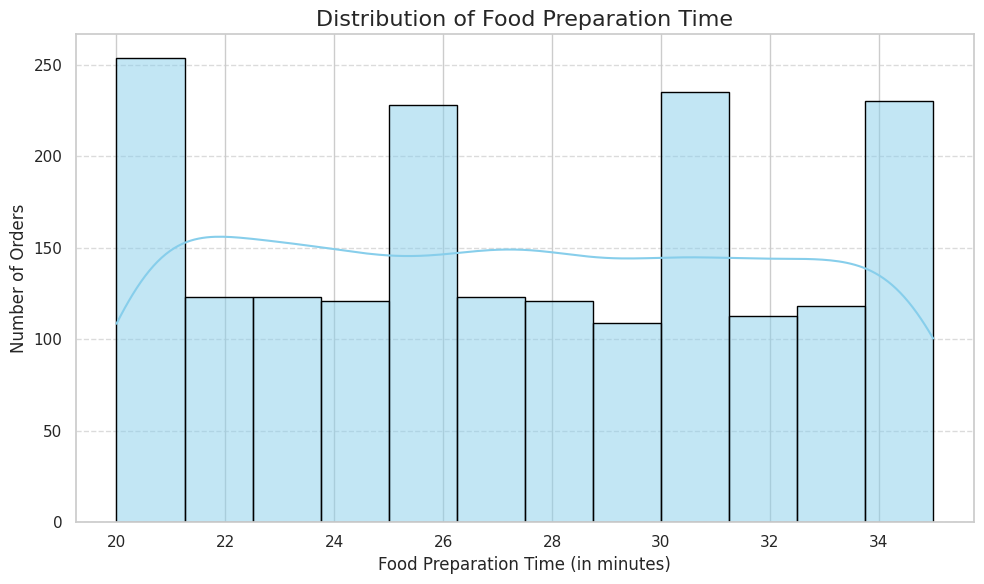

In [126]:
#Understanding the distribution of food_preparation_time with histplot
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='food_preparation_time', kde=True, color='skyblue', edgecolor='black')

plt.title('Distribution of Food Preparation Time', fontsize=16)
plt.xlabel('Food Preparation Time (in minutes)', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Observation** :

The food preparation time has been consistent across restaurants across cuisine types.

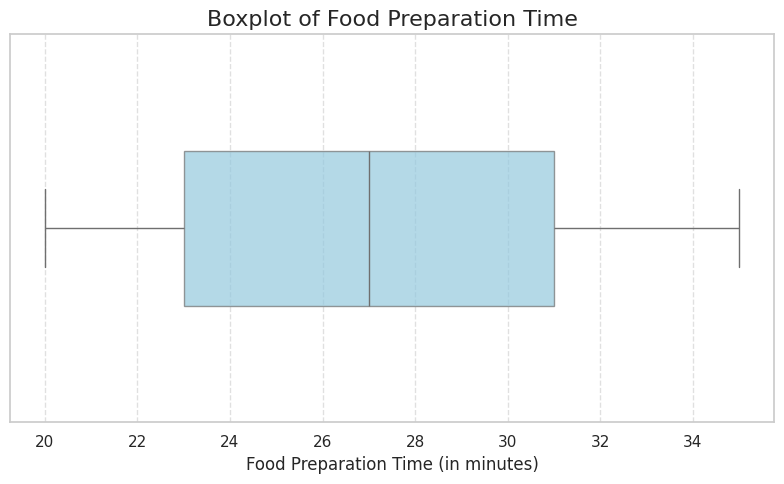

In [127]:
#Understanding the 5 number summary with the boxplot for food_preparation_time
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='food_preparation_time', color='skyblue', width=0.4, fliersize=4, boxprops=dict(alpha=0.7))

#formatting the plot
plt.title('Boxplot of Food Preparation Time', fontsize=16)
plt.xlabel('Food Preparation Time (in minutes)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


**Observation** :

 The boxplot reveals that most food orders are prepared within a moderate time window.

#### 4. Delivery time

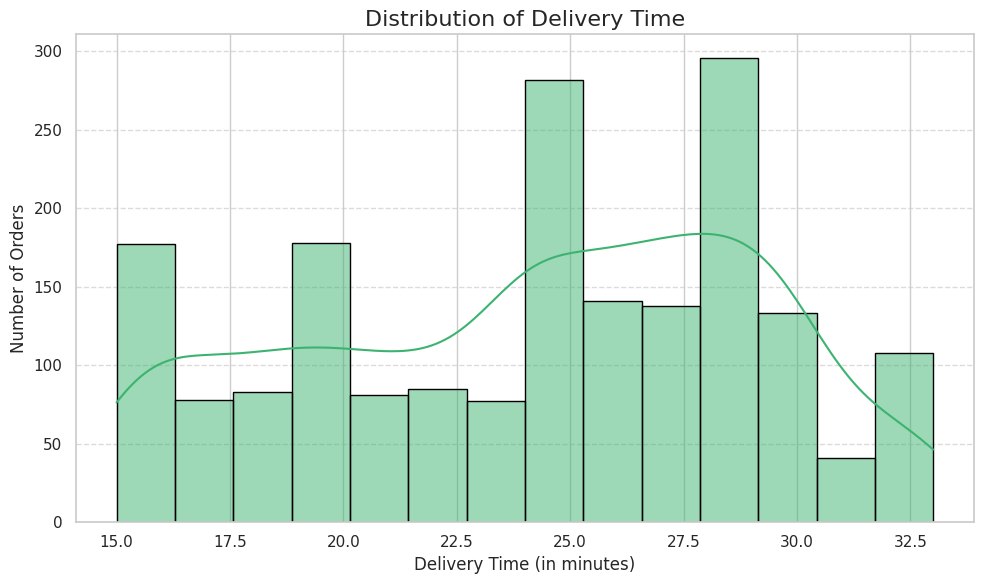

In [128]:
# Plotting the distribution of delivery time
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='delivery_time', kde=True, color='mediumseagreen', edgecolor='black')

plt.title('Distribution of Delivery Time', fontsize=16)
plt.xlabel('Delivery Time (in minutes)', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Observations**:
- The majority of orders have delivery times clustered between 24 to 30 minutes, suggesting this is the typical delivery window.

- The distribution is slightly right-skewed, indicating that while most deliveries are prompt, a small number of orders take longer than usual (above 30 minutes).

- There are multiple local peaks (multimodal distribution), especially around 20, 25, and 28 minutes, possibly due to operational batching or delivery zones.

- No extreme outliers are present in this view, meaning most delivery times fall within a reasonable range.

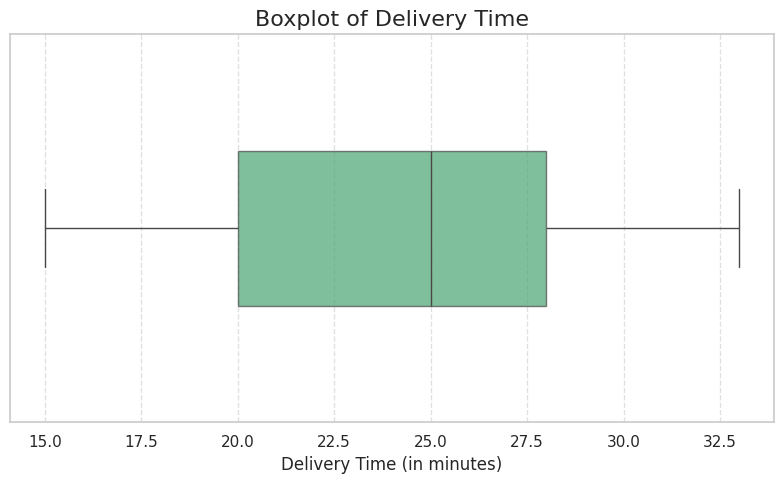

In [129]:
# Visualizing outliers and central tendency using a boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='delivery_time', color='mediumseagreen', width=0.4, fliersize=4, boxprops=dict(alpha=0.7))

plt.title('Boxplot of Delivery Time', fontsize=16)
plt.xlabel('Delivery Time (in minutes)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Observation** :
- The interquartile range (IQR) is tightly packed, indicating that most deliveries occur between approximately 20 and 28 minutes.

- The median delivery time appears to be around 25 minutes, suggesting a fairly consistent delivery window.


#### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [130]:
df.groupby('restaurant_name')['order_id'].count().sort_values(ascending=False).head()

,order_id
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


**Observations**:

There's a sharp drop in order volume after the top restaurant - Shake Shack has over 65% more orders than the second-place restaurant. Two restaurants from Blue ribbon group (Sushi and fried chicken) appear in the top five, which may suggest a strong brand presence and customer loyalty.


#### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [131]:
df.loc[df['day_of_the_week']=='Weekend'].groupby('cuisine_type')['order_id'].count().sort_values(ascending=False).head(1)


,order_id
cuisine_type,
American,415


**Observations**:

American cuisine is most popular on the weekends


#### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [132]:
#Fetching the number of records with cost>$20
above_20 = df.loc[df['cost_of_the_order']>20]['order_id'].count()

#Fetching the number of total orders
all = df['order_id'].count()

#Calculating the percentage
percent = (above_20/all)*100
print(percent)

29.24130663856691


**Observations**:

 29.24% of all the orders cost above $20


#### **Question 10**: What is the mean order delivery time? [1 mark]

In [133]:
print(df['delivery_time'].mean())

24.161749209694417


**Observations**:

The mean order delivery time is 24.16 minutes

#### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [134]:
df.groupby(df['customer_id'])['order_id'].count().sort_values(ascending=False).head(3)

,order_id
customer_id,
52832,13
47440,10
83287,9


**Observations**:

Customer 52832 is the most ordered customer with 13 orders, followed by customer 47440 with 10 orders. Customer 83287 is the 3rd most frequently ordering customer who has placed 9 orders.


### **Multivariate Analysis**

Multivariate Analysis refers to statistical techniques used to **analyze more than two variables simultaneously** to understand** patterns, relationships, and effects** among them. It provides deeper insights, especially when variables interact or influence each other.



#### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


I have divided the multivariate analysis into

1. Numerical versus Numerical
2. Categorical versus numerical

for logical flow.

#### 1. Numerical versus numerical

<ipython-input-135-9b800c69140f>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


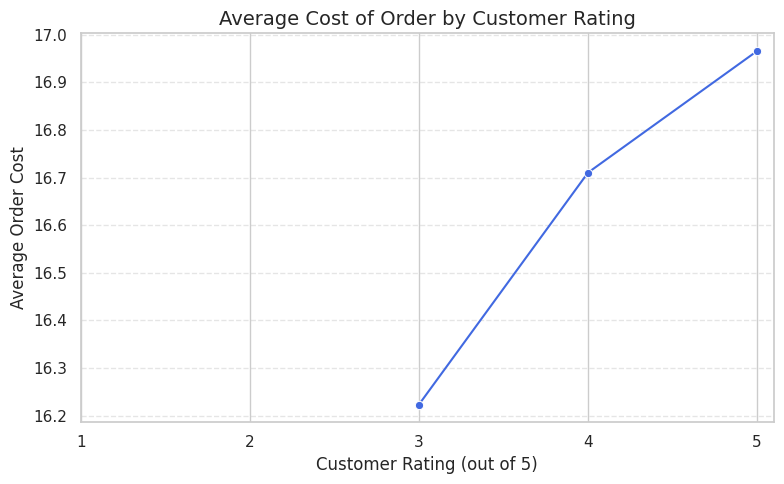

In [135]:
# Set the figure size for better readability
plt.figure(figsize=(8, 5))

# Create a line plot to show average order cost by rating
sns.lineplot(
    data=df,
    x='rating',
    y='cost_of_the_order',
    ci=None,                      # Turn off confidence interval for clarity
    marker='o',                   # Add data points
    linestyle='-',
    color='royalblue'             # Set a clean color
)

# Set ticks, titles, and labels
plt.xticks(ticks=[1, 2, 3, 4, 5])
plt.title('Average Cost of Order by Customer Rating', fontsize=14)
plt.xlabel('Customer Rating (out of 5)', fontsize=12)
plt.ylabel('Average Order Cost', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Observation** :

- There is a positive correlation between the rating given by customers and the average cost of the order.

- Customers who gave higher ratings (4 and 5) tend to have placed more expensive orders compared to those who gave lower ratings (3).

- This trend may indicate that:

 -- Higher-cost orders are associated with better food quality or service, which leads to better ratings.

 -- Premium-priced restaurants may be offering a better customer experience overall, resulting in better reviews.

- The increase in cost with rating is gradual but consistent, suggesting a potential linear relationship.

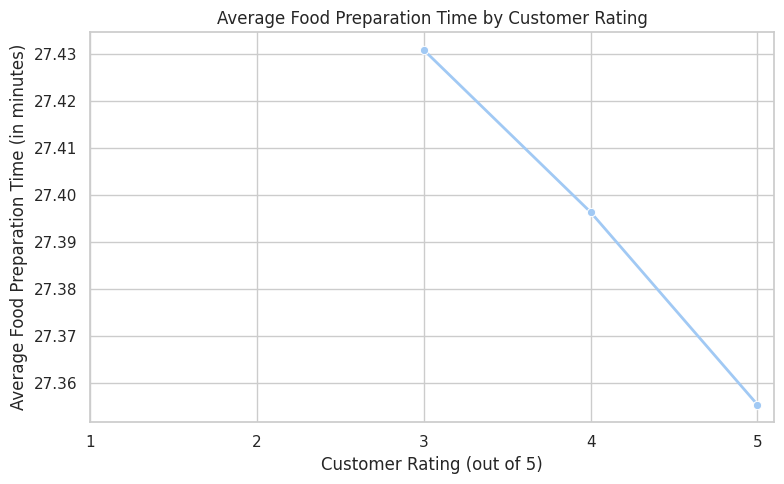

In [136]:
avg_prep_time = df.groupby('rating')['food_preparation_time'].mean().reset_index()

# Plotting the relationship
plt.figure(figsize=(8, 5))
sns.lineplot(data=avg_prep_time, x='rating', y='food_preparation_time', marker='o', linewidth=2)

# Plot enhancements
plt.title('Average Food Preparation Time by Customer Rating')
plt.xlabel('Customer Rating (out of 5)')
plt.ylabel('Average Food Preparation Time (in minutes)')
plt.xticks(ticks=range(1, 6))  # Ratings from 1 to 5
plt.grid(True)
plt.tight_layout()
plt.show()


**Observation** :
- *Slight Decrease with Higher Ratings*:
As customer ratings increase from 3 to 5, the average food preparation time slightly decreases from ~27.43 to ~27.35 minutes.

- *Narrow Range*:
The difference in preparation time across ratings is minimal (less than 0.1 minute), suggesting food preparation time is not a strong factor influencing customer ratings in this dataset.

- *Stable Preparation Time*:
The average preparation time is generally stable across different ratings, indicating that restaurants maintain a consistent prep speed regardless of customer sentiment.

<ipython-input-99-e3b646963b5c>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data=df_cost, x='rating', y='delivery_time', marker='o', linewidth=2, ci=False)


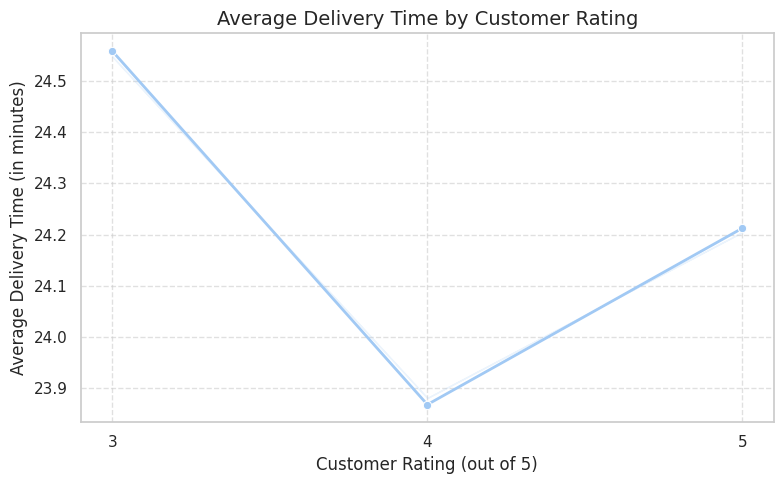

In [99]:
# Average Delivery Time by Customer Rating
plt.figure(figsize=(8, 5))
sns.lineplot(data=df_cost, x='rating', y='delivery_time', marker='o', linewidth=2, ci=False)

# Add titles and labels
plt.title('Average Delivery Time by Customer Rating', fontsize=14)
plt.xlabel('Customer Rating (out of 5)', fontsize=12)
plt.ylabel('Average Delivery Time (in minutes)', fontsize=12)
plt.xticks(ticks=[3, 4, 5])  # Assuming 'Not given' is excluded
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


**Observation**:

- There appears to be a U-shaped trend:
As delivery time decreases, customer satisfaction improves (from 3 to 4), but a slight increase in delivery time for rating 5 shows that delivery speed alone is not the sole factor affecting customer satisfaction.

- Rating 4 may be the “sweet spot” for efficient operations, while rating 5 involves a more holistic satisfaction (good delivery, great food, service, etc.).



##### Relation between various numerical columns

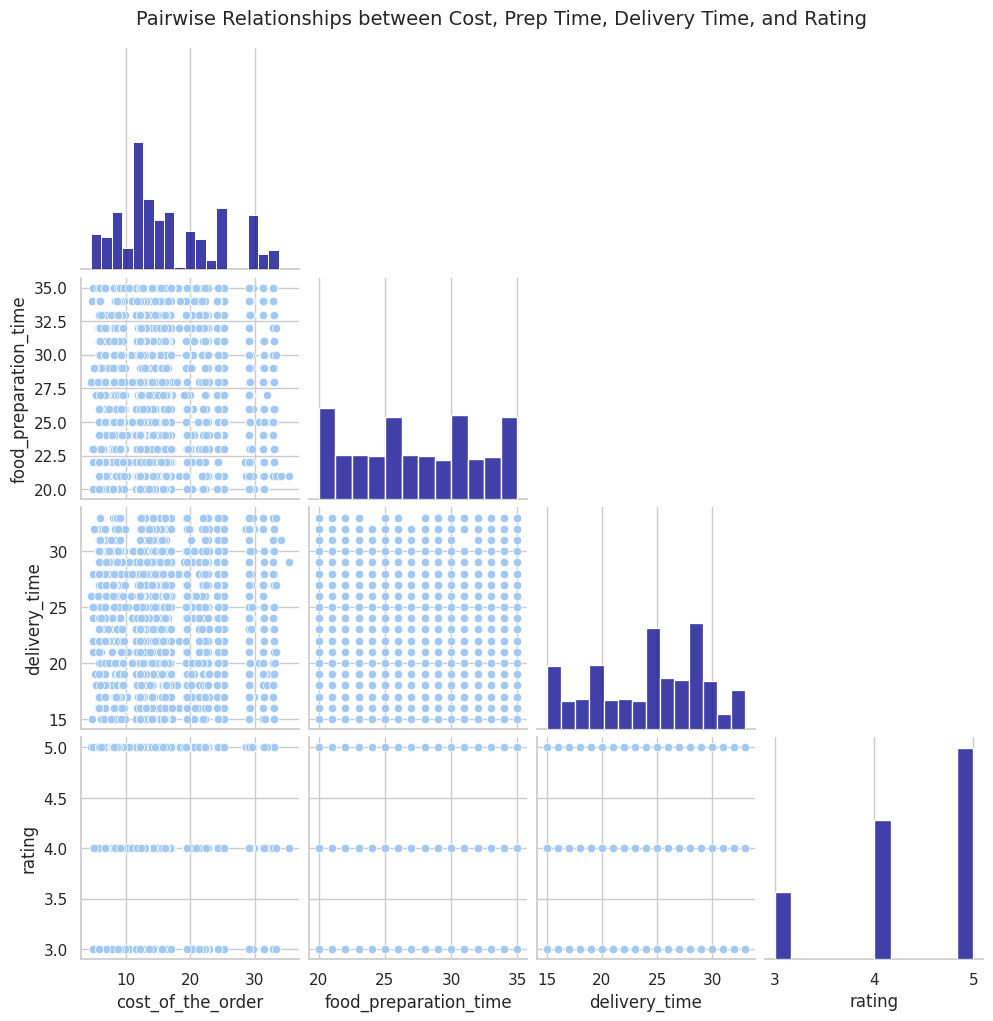

In [100]:
# Set visual theme
sns.set(style="whitegrid", palette="pastel")

# Create pairplot
sns.pairplot(
    df[['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating']],
    corner=True,
    diag_kws={'fill': True, 'color': 'darkblue'}  # histogram fill on diagonal
)

# Set a title for the entire plot
plt.suptitle("Pairwise Relationships between Cost, Prep Time, Delivery Time, and Rating", y=1.02, fontsize=14)

plt.show()

**Observation** : From the plots of different numerical columns it can be seen that all of them are independent.

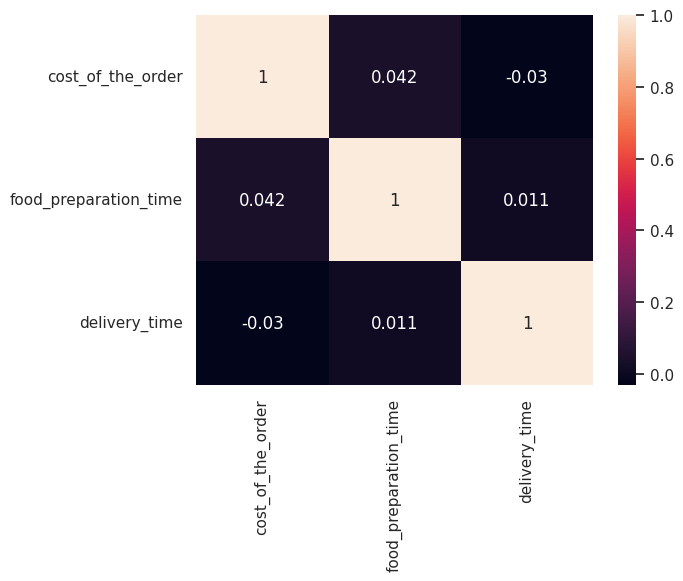

In [101]:
sns.heatmap(df[['cost_of_the_order','food_preparation_time','delivery_time']].corr(), annot=True)
plt.show()

**Observation** : It is evident from the above heatmap that there is no correlation between the numerical columns of the dataset.

#### 2. Numerical versus categorical

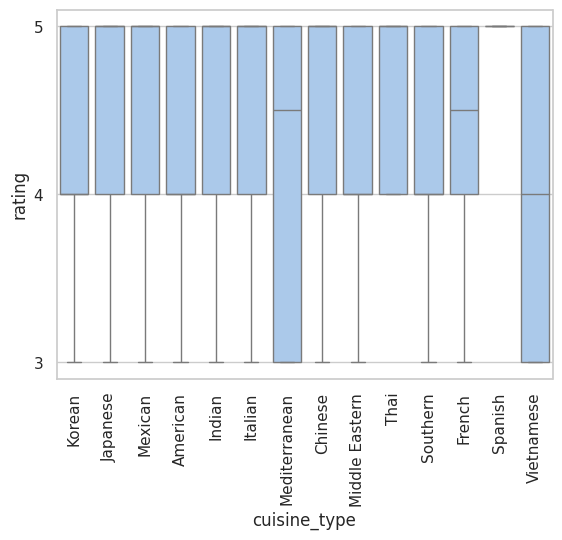

In [102]:
#Cuisine type and ratings
plt.yticks(ticks=range(0, 6, 1))
plt.xticks(rotation = 90)
sns.boxplot(df_cost, x='cuisine_type', y='rating', showfliers=False);

**Observation** :
For most of the cuisine types ratings are skewed to right except for mediterranean and vietnamese. Most Spanish dishes get 5 star rating. More closer examination is required for orders with spanish cuisine type.

In [103]:
df_cost.loc[df_cost['cuisine_type']=='Spanish']['rating'].value_counts()

,count
rating,
5.0,5
4.0,1


**Observation** : it is validated that most spanish cuisines get 5 star ratings, if at all rated.

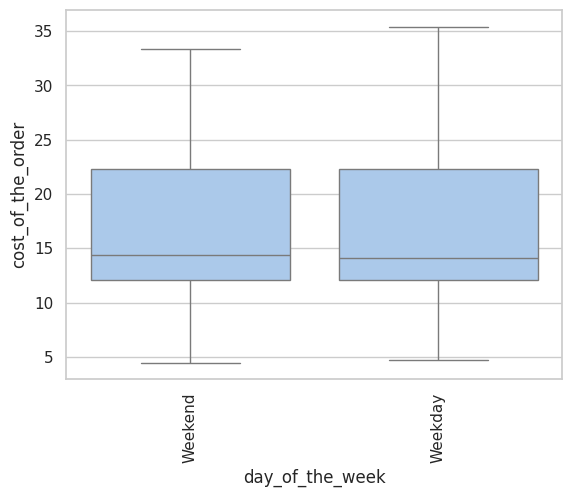

In [104]:
# Week of the day and cost_of_the_order
plt.xticks(rotation = 90)
sns.boxplot(df, x='day_of_the_week', y='cost_of_the_order', showfliers=False);

**Observation** :

The cost of the order doesn't show much variation between weekendds and weekdays. Nevertheless the right whisker is longer for the weekends suggesting people will to spend more. On a given day 50% of the orders are above $15.

#### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [105]:
eligible_restaurants = df_cost.groupby('restaurant_name').agg({'rating':['count','mean']})
eligible_restaurants.loc[(eligible_restaurants['rating']['count']>50) & (eligible_restaurants['rating']['mean']>4)]


rating          
                           count      mean
restaurant_name                           
Blue Ribbon Fried Chicken     64  4.328125
Blue Ribbon Sushi             73  4.219178
Shake Shack                  133  4.278195
The Meatball Shop             84  4.511905

**Observation**:

There are 4 restaurants which qualify for the promotional offer. Blue Ribbon group again proves to be a trusted group.


#### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [106]:
def calculate_revenue(row):
    if row['cost_of_the_order'] > 20:
        return row['cost_of_the_order'] * 0.25
    elif row['cost_of_the_order'] > 5 and row['cost_of_the_order'] <= 20 :
        return row['cost_of_the_order'] * 0.15
    else:
        return 0

df['revenue'] = df.apply(calculate_revenue, axis=1)
print(df['revenue'].sum())

6166.303


**Observation**:
The aggregator has earned $6166.303 across all orders

#### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [107]:
df['total_time'] = df['food_preparation_time']+df['delivery_time']
percentage = (df.loc[df['total_time']>60]['order_id'].count()/df['order_id'].count())*100
print(percentage)

10.537407797681771


**Observation** :

 More than 10% of all orders take more than an hour after ordering.

#### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [108]:
mean_weekday = df.loc[df['day_of_the_week']=='Weekday']['delivery_time'].mean()
mean_weekend = df.loc[df['day_of_the_week']=='Weekend']['delivery_time'].mean()
print(mean_weekday)
print(mean_weekend)

28.340036563071298
22.4700222057735


<Axes: xlabel='day_of_the_week', ylabel='delivery_time'>

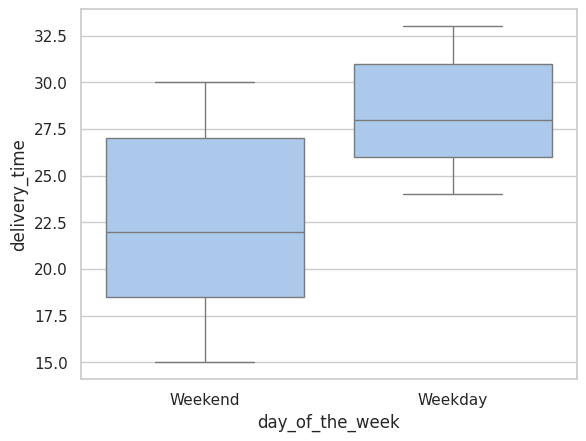

In [109]:
sns.boxplot(df, x='day_of_the_week', y='delivery_time')

**Observations**:
On a weekday it takes longer to deliver the order than on the weekend.

## **Conclusion and Recommendations**

#### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

#### Conclusions:
* **Data Overview**:

  -> There are 1,898 orders with 9 columns.

  -> Data types are mostly appropriate: 4 strings, 4 integers, and 1 float.

  -> No missing values, ensuring a clean dataset for analysis.

* **Customer Feedback**:

  -> Around 736 orders (≈ 39%) lack customer ratings, indicating a gap in feedback collection.

  -> Customer engagement with the rating system is low.

* **Cost & Cuisine Trends**:

  -> Most orders are in the \$5–$35 range.

  -> American cuisine is the most popular, especially on weekends.

  -> Roughly 29% of orders cost above $20, showing a decent premium market.

* **Restaurant & Customer Insights**:

  -> Shake Shack dominates order volume, with 65% more orders than the next best restaurant.

  -> Customer 52832 is the most frequent customer, placing 13 orders.

  -> Brands like Blue Ribbon show strong repeat engagement, hinting at brand loyalty.

* **Time Analysis**:

  -> Food preparation time ranges from 20 to 35 minutes, averaging ~27 minutes.

  -> Delivery time averages ~24 minutes, with minimal skew and no major outliers.

  -> Longer preparation time correlates with lower ratings, suggesting customer impatience.

#### Recommendations:

*  **Improve Feedback Rate**:

  ->Incentivize customers (e.g., discounts or loyalty points) to submit ratings.

  -> Use pop-ups or push notifications after delivery to encourage feedback.

* **Operational Improvements**:

  -> Optimize kitchen workflows at restaurants where prep time is high to enhance customer satisfaction.

  -> Track and improve delivery logistics to keep delivery time below average.

* **Marketing Strategy**:

  -> Promote high-performing restaurants like Shake Shack and Blue Ribbon group to new users.

  -> Use successful customer patterns (like those of customer 52832) to design targeted promotions.

* **Menu and Pricing Optimization**:

  -> Highlight American cuisine more on weekends, maybe via featured banners or discounts.

  -> Upsell premium items to the 29% of customers who already spend >$20.

* **Customer Segmentation**:

  -> Segment customers based on order frequency and value to provide personalized offers.

  -> Target customers who order frequently but don’t rate, encouraging more feedback.